## Canny Edge Detector
- While image gradients tend to be important building blocks for more advanced techniques like the Canny edge detector
- An edge is defined as a discontuinity in pixel intensity or more simply a sharp difference and change in pixel values.

### Types of edges in an image 
- **Step Edge**: Forms when there is an abrupt change in pixel intensity from one side of the discontuinity to the other.
- **Ramp Edge**: Change in pixel intensity is not instantenous. Instead, the change in pixel valye occurs a short but finite distance.
- **Ridge Edge**: Occurs when image intensity abruptly changes and then return to initial value after a short distance.
- **Roof edge**: Unlike the ridge edge where there is short, finite plateau at the top, roof edge has no such plateau. Its like a tip of an arrow.


### Steps in Canny edge detection:
- **Gaussian smoothing**: We want to ignore the much of the detail and focus on actual structure, thus we apply smoothing.
- **Gradient orientation and magnitude**: Quite susceptible to noise and does not make for the best edge detector. Thus, two more steps.
- **Non-maxima suppression (Edge thinning)**: For a given region, there should be only one edge response.
    - Compute $G$ and $\theta$ at each pixel in the image.
    - Compare the current(center) pixel in the region to the 3x3 neighbour surrounding it
    - Determine which direction Orientation is pointing. If orientation towards
        - North/south, examine north and south magnitudes.
        - East/west, examine east and west magnitudes
    - If center pixel intensity > both the pixels being compared to, keep it, else discard center pixel.
- **Hysteresis thresholding**: To remove regions of an image that are still not technically edges, we need to define two thresholds: $T_{lower}$ and $T_{upper}$
    - Any gradient value $G > T_{upper}$ is sure to be an edge(strong edge)
    - Any gradient value $G < T_{lower}$ is not an edge, so discard
    - Any gradient value that is $T_{lower}< G< T_{upper}$, must undergo two more tests
        - If particular edge connected to strong edge, then pixel is an edge.
        - If the gradient pixel is not connected to a strong edge the discard it.

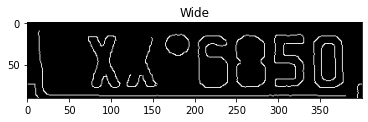

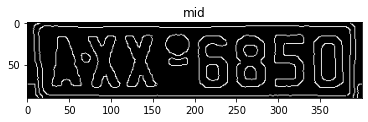

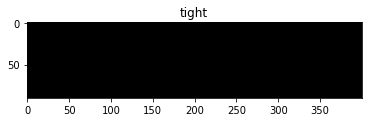

In [8]:
import sys
sys.path.append("../../")
import argparse
import cv2
from cv_imshow import display_image

args = {
    "image":"../../images/license_plate.png"
}


image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)

cv2.imshow("Original", image)
cv2.imshow("Blurred", blurred)

wide = cv2.Canny(blurred, 10, 170)
mid = cv2.Canny(blurred, 30,150)
tight = cv2.Canny(blurred, 240,250)

display_image("Wide", wide)
display_image("mid", mid)
display_image("tight", tight)